In [93]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [31]:
class map:
    def __init__(self,x_size,y_size):
        self.x_size = x_size
        self.y_size = y_size
        self.map_grid = np.full((y_size,x_size),255)
        return
    
    def show_map(self):
        fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
        plt.imshow(5*self.map_grid,cmap='gray')
        plt.show()
        
    def add_landmark(self,land_id,xpos,ypos,size,sym):
        self.map_grid[ypos-size:ypos+size,xpos-size:xpos+size] = land_id*np.ones((2*size,2*size))
        if(sym == 'x'):
            sym_x = xpos
            sym_y = self.y_size - ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))

        if(sym == 'y'):
            sym_x = self.x_size - xpos
            sym_y = ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))

        if(sym == 'xy'):
            sym_x = self.x_size - xpos
            sym_y = self.y_size - ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))
            self.add_landmark(land_id,xpos,ypos,size,'x')
            self.add_landmark(land_id,xpos,ypos,size,'y')
        
            
        return
    
    def add_rect(self,x_c,y_c,length,width,sym,rect_id = 0 ):
        self.map_grid[int(y_c - length/2):int(y_c+ length/2),int(x_c-width/2):int(x_c+ width/2)] = rect_id*np.ones((length,width))  
        if(sym =='x'):
            sym_x = x_c
            sym_y = self.y_size - y_c
            self.map_grid[int(sym_y - length/2):int(sym_y+ length/2),int(sym_x-width/2):int(sym_x+ width/2)] = rect_id*np.ones((length,width))  
        if(sym =='y'):
            sym_x = self.x_size - x_c
            sym_y = y_c
            self.map_grid[int(sym_y - length/2):int(sym_y+ length/2),int(sym_x-width/2):int(sym_x+ width/2)] = rect_id*np.ones((length,width))
    
        if(sym == 'xy'):
            sym_x = self.x_size - x_c
            sym_y = self.y_size - y_c
            self.map_grid[int(sym_y - length/2):int(sym_y+ length/2),int(sym_x-width/2):int(sym_x+ width/2)] = rect_id*np.ones((length,width))
            self.add_rect(x_c,y_c,length,width,'x')
            self.add_rect(x_c,y_c,length,width,'y')
        return
        
    
    def read_from_file(self,path):
        with open(path) as fp:
            for count,line in enumerate(fp):
                obst = []
                for word in line.split():
                    obst.append(word)
                self.add_landmark(int(obst[0]),int(obst[1]),int(obst[2]),int(obst[3]),obst[4])
                
    def save_map(self,path):
        np.savetxt(path,self.map_grid,fmt="%s")
                    

In [115]:
class map_:
    def __init__(self,x_size,y_size):
        self.x_size = x_size
        self.y_size = y_size
        self.map_grid = np.full((y_size,x_size),255)
        return
    
    def show_map(self):
        fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
        plt.imshow(5*self.map_grid,cmap='gray')
        plt.show()
        
    def add_landmark(self,land_id,xpos,ypos,size,sym):
        self.map_grid[ypos-size:ypos+size,xpos-size:xpos+size] = land_id*np.ones((2*size,2*size))
        if(sym == 'x'):
            sym_x = xpos
            sym_y = int(self.y_size/2) + ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))

        if(sym == 'y'):
            sym_x = int(self.x_size/2) + xpos
            sym_y = ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))

        if(sym == 'xy'):
            sym_x = int(self.x_size/2) + xpos
            sym_y = int(self.y_size/2) + ypos
            self.map_grid[sym_y-size:sym_y+size,sym_x-size:sym_x+size] = land_id*np.ones((2*size,2*size))
            self.add_landmark(land_id,xpos,ypos,size,'x')
            self.add_landmark(land_id,xpos,ypos,size,'y')
        
            
        return
    
    def add_rect(self,x_c,y_c,length,width,sym,rect_id = 0 ):
        self.map_grid[int(y_c):int(y_c + length),int(x_c):int(x_c + width)] = rect_id*np.ones((length,width))  
        if(sym =='x'):
            sym_x = x_c
            sym_y = self.y_size - y_c
            self.map_grid[int(sym_y - length/2):int(sym_y+ length/2),int(sym_x-width/2):int(sym_x+ width/2)] = rect_id*np.ones((length,width))  
        if(sym =='y'):
            sym_x = self.x_size - x_c
            sym_y = y_c
            self.map_grid[int(sym_y - length/2):int(sym_y+ length/2),int(sym_x-width/2):int(sym_x+ width/2)] = rect_id*np.ones((length,width))
    
        if(sym == 'xy'):
            sym_x = self.x_size - x_c
            sym_y = self.y_size - y_c
            self.map_grid[int(sym_y - length/2):int(sym_y+ length/2),int(sym_x-width/2):int(sym_x+ width/2)] = rect_id*np.ones((length,width))
            self.add_rect(x_c,y_c,length,width,'x')
            self.add_rect(x_c,y_c,length,width,'y')
        return
        
    
    def read_from_file(self,path):
        with open(path) as fp:
            for count,line in enumerate(fp):
                obst = []
                for word in line.split():
                    obst.append(word)
                self.add_landmark(int(obst[0]),int(obst[1]),int(obst[2]),int(obst[3]),obst[4])

    def copy_right(self):
        self.map_grid = np.append(self.map_grid, self.map_grid, axis=1)
            
    def save_map(self,path):
        np.savetxt(path,self.map_grid,fmt="%s")
                    

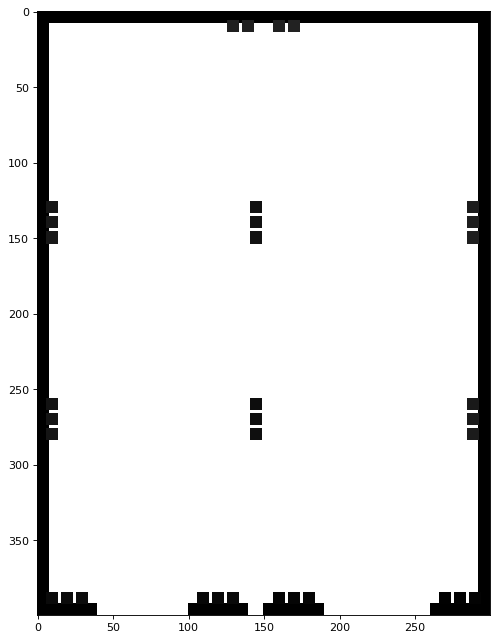

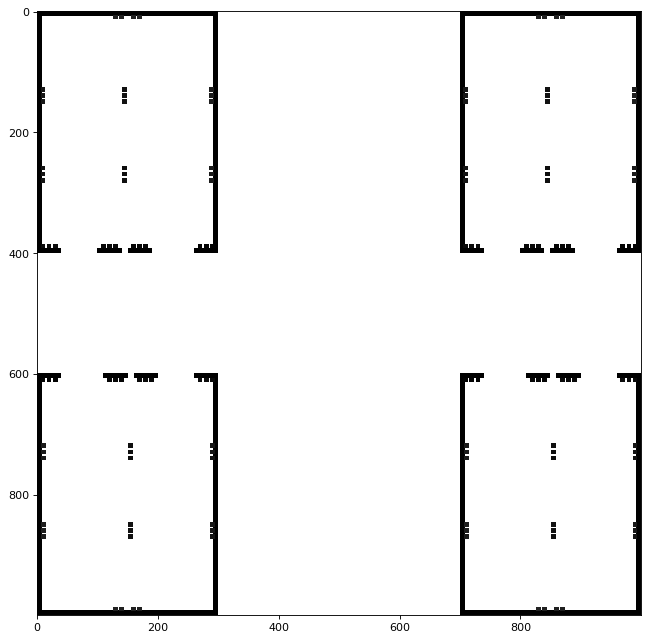

In [151]:
wall_width = 8
wall_length = 40
le_map = map_(300,400);


le_map.add_rect(0,0,400,wall_width,'')
le_map.add_rect(300-wall_width,0,400,wall_width,'')
le_map.add_rect(0,0,wall_width,300,'')
le_map.add_rect(0,400 - wall_width,wall_width,wall_length,'')
le_map.add_rect(0,400 - wall_width,wall_width,wall_length,'')
le_map.add_rect(300-wall_length,400 - wall_width,wall_width,wall_length,'')
le_map.add_rect(300-wall_length,400 - wall_width,wall_width,wall_length,'')
le_map.add_rect(120 - wall_length/2, 400 - wall_width, wall_width, wall_length,'')
le_map.add_rect(170 - wall_length/2, 400 - wall_width, wall_width, wall_length,'')
# le_map.add_rect(150,200,400,wall_width,'xy')



# 
# le_map.add_rect(3,200,400,wall_width,'')

# le_map.add_rect(150,3,wall_width,300,'')
# le_map.add_rect(25,400,wall_width,40,'')
# le_map.add_rect(120,400,wall_width,40,'')
# le_map.add_rect(170,400,wall_width,40,'')
# le_map.add_rect(280,400,wall_width,40,'')
le_map.read_from_file("add_map_test.txt")
# le_map.add_rect(430,500,450,wall_width,'y')
# le_map.add_rect(5,500,1000,10,'')
# le_map.add_rect(995,500,1000,10,'')
# le_map.add_rect(500,995,10,1000,'')
# le_map.add_rect(500,5,10,1000,'')
room = le_map.map_grid
le_map.show_map()
space_h = 255*np.ones((400,400))
le_map.map_grid = np.hstack((le_map.map_grid,space_h))
le_map.map_grid = np.hstack((le_map.map_grid,room))
upper_part = copy.deepcopy(le_map.map_grid)
space_v = 255*np.ones((200,1000))
le_map.map_grid = np.vstack((le_map.map_grid,space_v))

# # Mirror X
# map_x =  map1[::-1,:]
# map1 = np.append(map1, map_x, axis=0)

# Rotate 180 
rot180 = np.rot90(upper_part, 2)
le_map.map_grid = np.vstack((le_map.map_grid,rot180))


# # Mirror Y
# map_y = map1[:,::-1]
# map1 = np.append(map1, map_y, axis=1)

# le_map.copy_right()
le_map.show_map()

In [161]:
le_map.save_map("map_dummy.txt")